In [1]:
#Definimos un campo vectorial.
#Definimos las ecuaciones diferenciales para un sistema masa-resorte acoplado.
#w es el vector de las variables.
#t es el tiempo.
#p es el vector de los parámetros.
def vectorfield(w, t, p):
    x1, y1, x2, y2 = w
    m1, m2, k1, k2, k3, L1, L2, b1, b2 = p
    f = [y1, ( -b1*y1 - k1*(x1 - L1) - k2*(x1 - L1 + L2 - x2))/m1, y2, ( -b2*y2 - k3*(x2 - L2) - k2*(x2 - L2 + L1 - x1))/m2]
    return f

In [2]:
#Asignación de valores de los parámetros.
from scipy.integrate import odeint
#Masas m1 y m2.
m1 = 2.0
m2 = 1.0
#Constantes de los resortes k1, k2 y k3.
k1 = 3.0
k2 = 2.0
k3 = 1.0
#Longitudes naturales L1 y L2.
L1 = 1.0
L2 = 1.0
#Coeficientes de Fricción b1 y b2.
b1 = 0.05
b2 = 0.09

#Condiciones Iniciales.
x1 = 1.0
y1 = 1.0
x2 = 0.0
y2 = 0.5

#Parámetros de resolución de Ecuaciones Diferenciales Ordinarias.
abserr = 1.0e-8
relerr = 1.0e-6
time = 30.0
points = 800

#Ancho de Paso (tiempo)
t = [time * float(i) / (points - 1) for i in range(points)]

p = [m1, m2, k1, k2, k3, L1, L2, b1, b2]
w0 = [x1, y1, x2, y2]

#Solucionador de Ecuaciones Diferenciales Ordinarias.
wsol = odeint(vectorfield, w0, t, args=(p,), atol=abserr, rtol=relerr)

for t1, w1 in zip(t,wsol):
    print(t1, w1[0], w1[1], w1[2], w1[3], file=open('resortes ','a'))

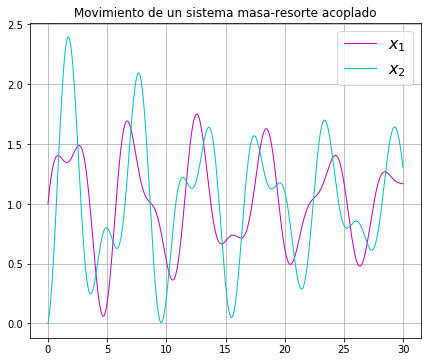

In [3]:
#Graficar la solución.
from matplotlib.font_manager import FontProperties
from numpy import loadtxt
import matplotlib.pyplot as plt

t, x1, y1, x2, y2 = loadtxt('resortes ',unpack=True)

plt.figure(figsize = (7,5.8))
plt.xlabel = ('Tiempo (s)')
plt.ylabel = ('Posición')
plt.grid(True)
lw = 1

plt.plot(t, x1, color = 'm', linewidth=lw)
plt.plot(t, x2, color = 'c', linewidth=lw)

plt.legend((r'$x_1$',r'$x_2$'), prop = FontProperties(size=16))
plt.title('Movimiento de un sistema masa-resorte acoplado')
plt.savefig('resorte',dpi=100)
plt.show()